In [1]:
import io

from IPython import display
import numpy as np
from PIL import Image

import deep_dream

In [2]:
cnn = deep_dream.CNN(deep_dream.GOOGLENET_BVLC, gpu=0)

In [3]:
# Embed JPEGs into the notebook instead of the default of PNG, decreasing file size.

def show(img):
    print(cnn.classify(img, 5))
    if isinstance(img, np.ndarray):
        img = deep_dream.to_image(img)
    buf = io.BytesIO()
    img.save(buf, format='jpeg', quality=85)
    display.display(display.Image(data=buf.getvalue()))

['n02793495 barn 425', 'n02859443 boathouse 449', 'n09332890 lakeside, lakeshore 975', 'n04604644 worm fence, snake fence, snake-rail fence, Virginia fence 912', 'n03776460 mobile home, manufactured home 660']


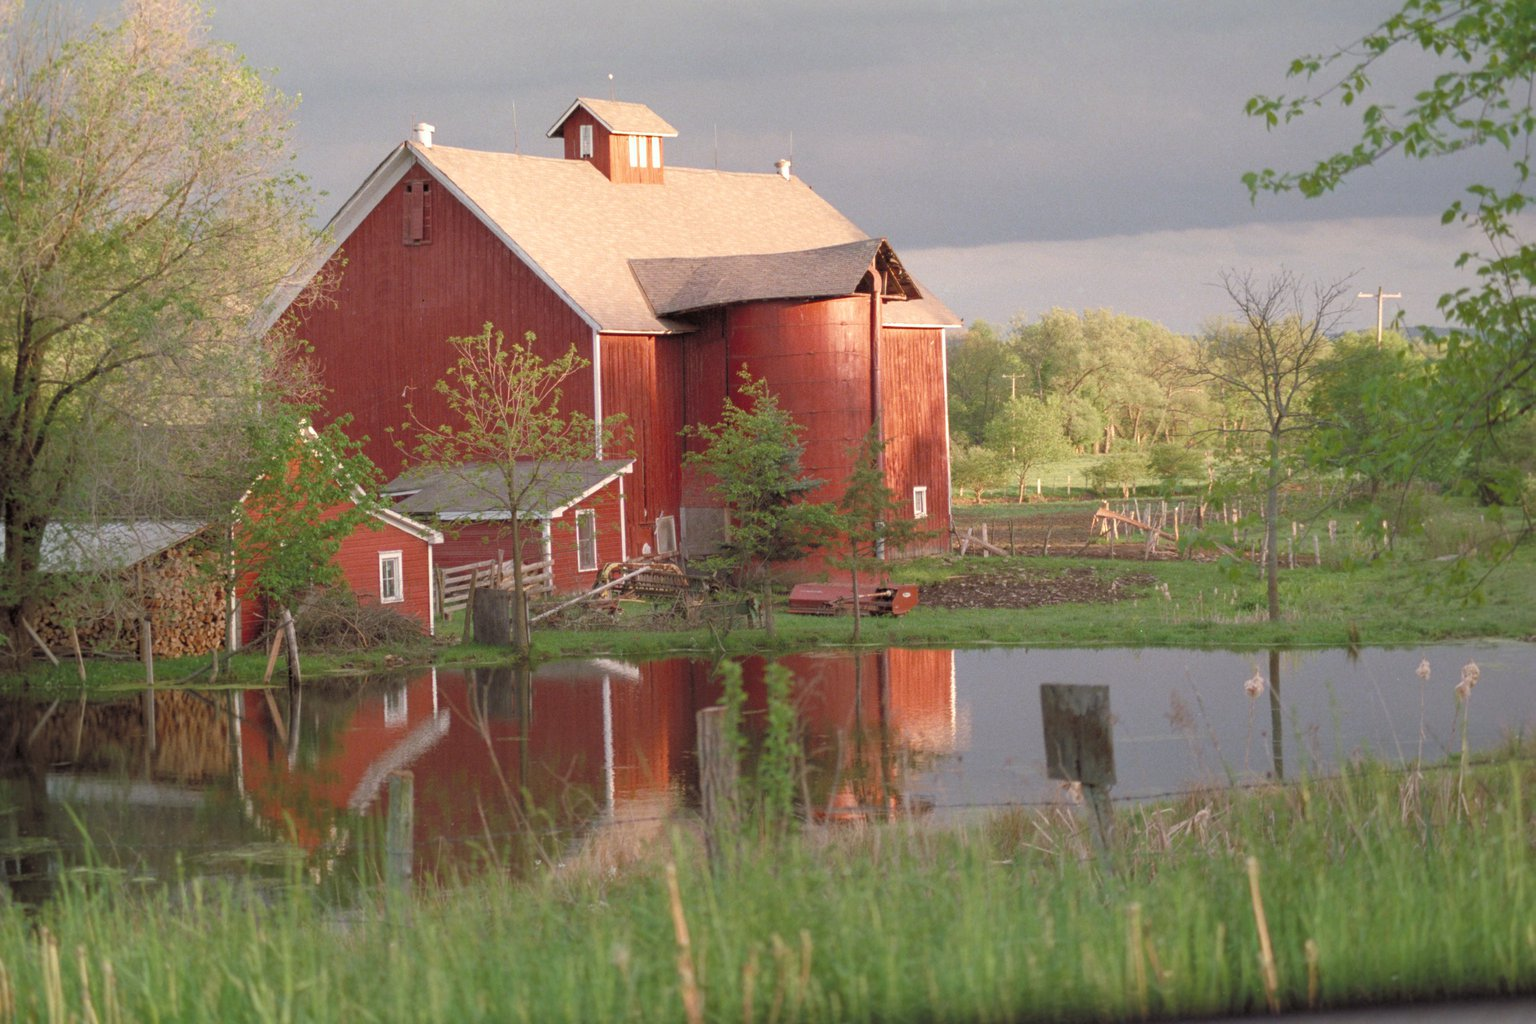

In [4]:
input_img = Image.open('kodim/img0022.jpg').resize((1536, 1024), Image.LANCZOS)
show(input_img)

100%|█████████████████████████████████████| 19.8M/19.8M [00:23<00:00, 942Kpix/s]


['n03840681 ocarina, sweet potato 684', 'n04462240 toyshop 865', 'n02966193 carousel, carrousel, merry-go-round, roundabout, whirligig 476', 'n03598930 jigsaw puzzle 611', 'n04423845 thimble 855']


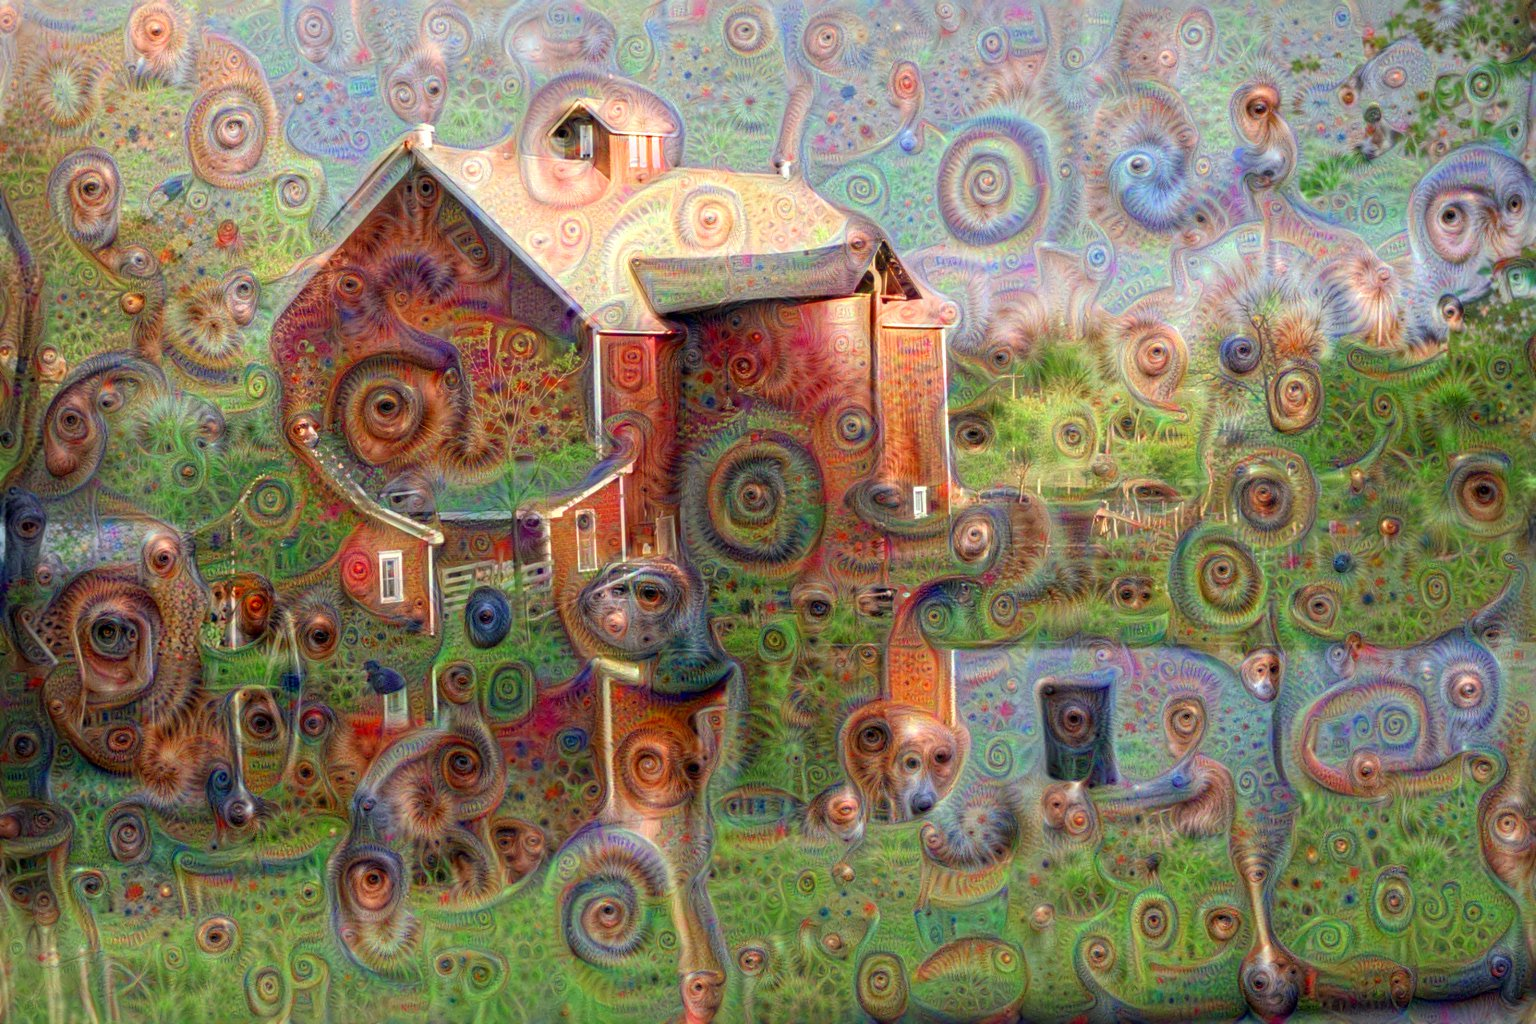

In [5]:
output_img = cnn.dream(input_img, {'inception_4a/pool_proj': 1},
                       scale=7*4, n=2, per_octave=8, step_size=4)
show(output_img)

In [6]:
output_img.save('output.jpg', quality=95)